# QTM 531 – Midsemester Project
## Ao Lyu (Lorna)

In this project, I did web scrapping to collect valuable data from Etsy, one of the most famous global online platforms for the sale and purchase of goods. Etsy is a live creative goods marketplace, including unique handmade things, vintage, and a high lot amount of craftwork items. With millions of buyers and sellers from around the world, there's a virtual treasure trove of unique items covering almost every known interest and passion. Their website helps humanity connect to sustainability with the promotion of small business and artisans and has really put them on the map for where to head when looking for something with personal flair.

This project aimed to extract detailed information about products listed under the "jewelry" category on Etsy. The extraction aimed at a wide range of key attributes, such as product names, original prices, current prices, discount rates, ratings, numbers of reviews, availability of free shipments, and product URLs. These characteristics would display the overall outlook of the product offerings, and at the same time, it allows doing detail analysis of the pricing strategies, customer satisfaction (as per the ratings and the count of reviews), and the prevalence of incentives, including the offer for free shipping.

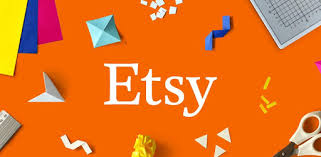

<font size = "5">

Import packages for data processing

In [152]:
# Manage datasets
import pandas as pd

# Work with time data
import time 

<font size = "5">

Import packages for HTML processing

In [153]:
# Conduct HTTP requests
import requests

# Construct tree structure of HTML data
import html5lib

# Parse HTML data obtained from scraping
from bs4 import BeautifulSoup as soup 
from bs4 import BeautifulSoup

<font size = "5">

Import packages for interactive <br>
website navigation

In [65]:
# Import webdriver for chrome
from webdriver_manager.chrome import ChromeDriverManager

from selenium import webdriver #to automate the navigating within the browser
from selenium.webdriver.common.keys    import Keys
from selenium.webdriver.support.ui     import Select
from selenium.webdriver.support.ui     import WebDriverWait 
from selenium.webdriver.common.by      import By
from selenium.webdriver.support        import expected_conditions as EC
from selenium.webdriver.chrome.options import Options #to use properties of the chrome webbrowser
from selenium.webdriver.remote.command import Command # Use to check whether the web driver is active
import os
import time
from datetime import date
import csv
from bs4 import BeautifulSoup
import subprocess
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By


# <span style="color:darkblue"> 1. Running Chrome from Python </span>

In [154]:
base_url = 'https://www.etsy.com/c/jewelry'

In [14]:
# options = Options()

# # True hides the navigating of the browser by the scraper,
# # False shows you the tab/window opening and stuff getting clicked
# options.headless = False 

# driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
#driver.get(base_url)

In [155]:
driver = webdriver.Chrome('path/to/chromedriver')

# Get the page where the dresses are listed
driver.get('https://www.etsy.com/c/jewelry')

# Once content is loaded, get the page source
html_content = driver.page_source

# Now you can use BeautifulSoup to parse the page source
soup = BeautifulSoup(html_content, 'html.parser')
# Find all elements that contain original prices
original_price_elements = soup.find_all('p', class_='wt-text-caption')

/var/folders/4d/z4q5k4qd0bgclyqnxbr4wkwr0000gn/T/ipykernel_95359/3046685082.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('path/to/chromedriver')


# <span style="color:darkblue"> 2. Scrap main variables </span>

In [156]:
# Find all elements that contain product names
product_name_elements = soup.find_all('h2', class_='v2-listing-card__title')

# Extract the product names
product_names = [elem.get_text(strip=True) for elem in product_name_elements]

#for name in product_names:
    #print(name)


In [157]:
# Initialize lists to store product information
original_prices = []
current_prices = []
discounts = []

# Iterate over each product element to extract pricing and discount information
for elem in soup.find_all('div', class_='v2-listing-card__info'):
    # Attempt to find the original price
    original_price_elem = elem.find('span', class_='wt-text-strikethrough')
    if original_price_elem and original_price_elem.find('span', class_='currency-value'):
        original_price = original_price_elem.find('span', class_='currency-value').get_text()
        original_prices.append(original_price)
        
        # Since there's an original price, attempt to find the discount
        discount_span = elem.find('span', text=lambda text: text and '% off' in text)
        if discount_span:
            discount_text = discount_span.get_text(strip=True)
            discounts.append(discount_text)
        else:
            discounts.append(pd.NA)
    else:
        # If there is no original price, append NA to both original_prices and discounts
        original_prices.append(pd.NA)
        discounts.append(pd.NA)
    
    # Attempt to find the current price
    current_price_elem = elem.find('p', class_='wt-text-title-01 lc-price')
    if current_price_elem and current_price_elem.find('span', class_='currency-value'):
        current_price = current_price_elem.find('span', class_='currency-value').get_text()
        current_prices.append(current_price)
    else:
        current_prices.append(pd.NA)


/var/folders/4d/z4q5k4qd0bgclyqnxbr4wkwr0000gn/T/ipykernel_95359/2545810362.py:15: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  discount_span = elem.find('span', text=lambda text: text and '% off' in text)


In [158]:
# Extract data-star ratings
data_star_elements = soup.find_all('input', {'name': ['initial-rating', 'rating']})
data_star_ratings = [float(elem['value']) for elem in data_star_elements if elem.has_attr('value')]

# Extract review counts
review_count_elements = soup.find_all('span', class_='wt-text-caption wt-text-gray wt-display-inline-block wt-nudge-l-3 wt-pr-xs-1')
review_counts = [elem.get_text(strip=True) for elem in review_count_elements]

# Extract product URLs
product_links = soup.find_all('a', class_='listing-link')
product_urls = [link['href'] for link in product_links]

In [189]:
# Initialize lists to store product information
numerical_ratings = []
review_counts = []

# Iterate over each product element to extract rating and review count information
for elem in soup.find_all('div', class_='v2-listing-card__info'):
    # Attempt to find the numerical rating
    rating_input_elem = elem.find('input', {'name': 'rating'})
    if rating_input_elem:
        numerical_rating = rating_input_elem['value']
        numerical_ratings.append(numerical_rating)
    else:
        numerical_ratings.append(pd.NA)
    
    # Attempt to find the review count
    review_count_elem = elem.find('span', class_='wt-text-caption')
    if review_count_elem:
        review_count_text = review_count_elem.get_text(strip=True)
        review_counts.append(review_count_text)
    else:
        review_counts.append(pd.NA)

In [164]:
# Find all 'a' tags with class 'listing-link'
product_links = soup.find_all('a', class_='listing-link')

# Extract the href attributes to get the URLs
product_urls = [link['href'] for link in product_links]

# Print the URLs
#for url in product_urls:
    #print(url)

In [165]:
# Initialize lists to hold extracted information, including free shipping data
free_shipping_info = []

# Iterate over each product element to extract information
for elem in soup.find_all('div', class_='v2-listing-card__info'):
    # Check for free shipping
    free_shipping_elem = elem.find('span', text=lambda text: 'FREE shipping' in text if text else False)
    if free_shipping_elem:
        free_shipping_info.append('FREE shipping')
    else:
        free_shipping_info.append(pd.NA)



/var/folders/4d/z4q5k4qd0bgclyqnxbr4wkwr0000gn/T/ipykernel_95359/161418410.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  free_shipping_elem = elem.find('span', text=lambda text: 'FREE shipping' in text if text else False)


In [166]:
data_star_ratings

[]

# <span style="color:darkblue"> 3. Create Datasets </span>

In [190]:
# Ensure all lists have the same length by padding shorter ones with pd.NA
max_len = max(len(product_names), len(original_prices), len(current_prices), len(discounts), 
              len(data_star_ratings), len(review_counts), len(product_urls), len(free_shipping_info))
lists_to_pad = [product_names, original_prices, current_prices, discounts, 
                numerical_ratings, review_counts, free_shipping_info,product_urls]
padded_lists = {name: lst + [pd.NA] * (max_len - len(lst)) for lst, name in zip(lists_to_pad, 
                ['Names', 'Original Prices', 'Current Prices', 'Discounts', 'Ratings', 
                'Review Counts', 'Free Shipping', 'URLs'])}

# Create a DataFrame
df = pd.DataFrame(padded_lists)

# IMPORTANT: Drop rows where the 'Names' column is NA
df = df.dropna(subset=['Names'])


# Print the file path for convenience
print('/mnt/data/products_full_info_with_shipping_cleaned.csv')

# Save DataFrame to CSV, specifying 'NA' for missing values
df.to_csv('/Users/aolyu/Documents/GitHub/qtm531spring2024/Assignment/midsemester_project/products_full_info_final.csv', index=False, na_rep='NA')

# Print the file path for convenience
print('/Users/aolyu/Documents/GitHub/qtm531spring2024/Assignment/midsemester_project/products_full_info_final.csv')

/mnt/data/products_full_info_with_shipping_cleaned.csv
/Users/aolyu/Documents/GitHub/qtm531spring2024/Assignment/midsemester_project/products_full_info_final.csv


In [191]:
df

,Names,Original Prices,Current Prices,Discounts,Ratings,Review Counts,Free Shipping,URLs
0,"Handmade Alexandrite Birthstone Necklace, Pers...",39.80,27.86,(30% off),4.7481,"(5,264)",FREE shipping,https://www.etsy.com/listing/1348120443/handma...
1,"Aquamarine Earrings Dangle, Blue Crystal Earri...",85.00,63.75,(25% off),4.9232,"(3,651)",FREE shipping,https://www.etsy.com/listing/1070700382/aquama...
2,Explore the Universe: Handmade Solar System Br...,23.13,5.78,(75% off),4.8281,"(1,710)",FREE shipping,https://www.etsy.com/listing/1604220619/explor...
3,"Paw Print Name Necklace, Personalized Tiny Dog...",35.00,17.50,(50% off),4.7607,"(13,713)",FREE shipping,https://www.etsy.com/listing/1651883112/paw-pr...
4,"Initials Necklace Ampersand or Heart, Letter N...",34.00,28.90,(15% off),4.8803,"(73,531)",FREE shipping,https://www.etsy.com/listing/159695340/initial...
...,...,...,...,...,...,...,...,...
59,"Gold Opal Ring, Opal Ring, Gold Ring, Delicate...",<NA>,34.00,<NA>,4.8662,"(5,579)",FREE shipping,https://www.etsy.com/listing/466529577/gold-op...
60,Two strand twisted knot ring - silver and gold...,<NA>,35.47,<NA>,4.8559,"(15,358)",FREE shipping,https://www.etsy.com/listing/452639322/two-str...
61,Crystal Necklace - Crystals Wire Wrap - Crysta...,33.00,28.05,(15% off),4.9333,(524),FREE shipping,https://www.etsy.com/listing/494478705/crystal...
62,Bicolor Flower Ring. Sterling ring with golden...,<NA>,44.16,<NA>,4.8412,"(39,426)",<NA>,https://www.etsy.com/listing/226531218/bicolor...


The next step in the project promises to further enrich our dataset and result in a deeper understanding of the Etsy marketplace because of the increased scope of data collection efforts from only the initial page. We are prepared to extract more data of the subsequent pages—in effect, page 2, page 3, and on. This is with the view of being able to establish a comprehensive dataset that will capture a much bigger spectrum from the jewelry category on Etsy. This multi-page scraping approach will actually allow us to paint a fuller picture of the marketplace, embracing more of its products and sellers.

Besides scraping the data from all the pages, the corresponding data of each product by clicking through the individual product links extracted in the first phase will be scraped. We will go to their respective page to gather more details per product: description, more images, and information about the seller, feedback from the customers, among others. At the granular level, this detail will allow giving very nuanced answers to the questions posed in this research: product variety, seller reputation, and customer satisfaction at Etsy.

The research now armed with this enriched dataset moves from the data cleaning phase into the data visualization phase, where various techniques of data visualization shall be applied to bring out trends, patterns, and nuggets of insights within the category of jewelry. This will involve use of visualizations of price distributions, comparisons of ratings and discount prevalence, among others, to the end of revealing underlying dynamics within the marketplace.


In the process, we hope to provide actionable insights that may benefit the sellers on the platform and valuable information for the consumers towards their purchase decisions. 